# Activity 1 – Data Visualization and Dashboard Deployment



In [1]:
# 1) Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (8,4)
sns.set(style='whitegrid')


In [2]:
# 2) Load data
df = pd.read_csv('university_student_data.csv')
df.head()


,Year,Term,Applications,Admitted,Enrolled,Retention Rate (%),Student Satisfaction (%),Engineering Enrolled,Business Enrolled,Arts Enrolled,Science Enrolled
0,2015,Spring,2500,1500,600,85,78,200,150,125,125
1,2015,Fall,2500,1500,600,85,78,200,150,125,125
2,2016,Spring,2600,1550,625,86,79,210,160,130,125
3,2016,Fall,2600,1550,625,86,79,210,160,130,125
4,2017,Spring,2700,1600,650,87,80,225,165,135,125


In [3]:
# 3) Document columns (name, dtype, basic description)
descriptions = {
    'Year': 'Academic year',
    'Term': 'Academic term: Spring or Fall',
    'Applications': 'Total number of applications received',
    'Admitted': 'Number of admitted students',
    'Enrolled': 'Number of enrolled students',
    'Retention Rate (%)': 'Percentage of students retained year-over-year',
    'Student Satisfaction (%)': 'Average student satisfaction percentage',
    'Engineering Enrolled': 'Number of enrolled Engineering students',
    'Business Enrolled': 'Number of enrolled Business students',
    'Arts Enrolled': 'Number of enrolled Arts students',
    'Science Enrolled': 'Number of enrolled Science students'
}
cols = []
for c in df.columns:
    cols.append({'column': c, 'dtype': str(df[c].dtype), 'non_nulls': int(df[c].notna().sum()), 'description': descriptions.get(c, '')})
pd.DataFrame(cols)


,column,dtype,non_nulls,description
0,Year,int64,20,Academic year
1,Term,object,20,Academic term: Spring or Fall
2,Applications,int64,20,Total number of applications received
3,Admitted,int64,20,Number of admitted students
4,Enrolled,int64,20,Number of enrolled students
5,Retention Rate (%),int64,20,Percentage of students retained year-over-year
6,Student Satisfaction (%),int64,20,Average student satisfaction percentage
7,Engineering Enrolled,int64,20,Number of enrolled Engineering students
8,Business Enrolled,int64,20,Number of enrolled Business students
9,Arts Enrolled,int64,20,Number of enrolled Arts students


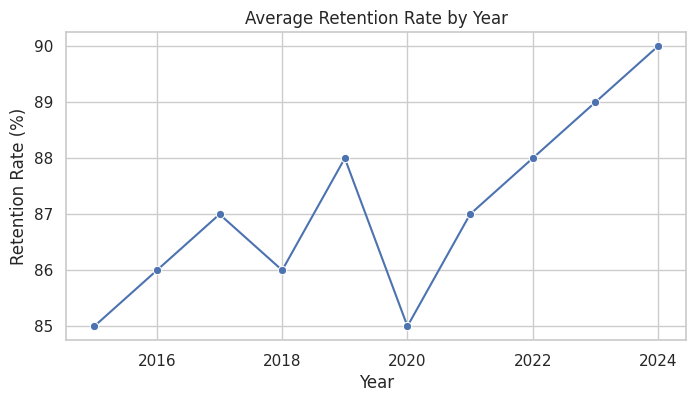

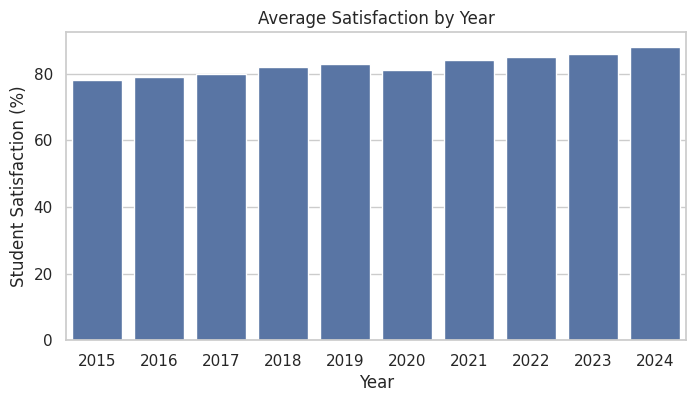

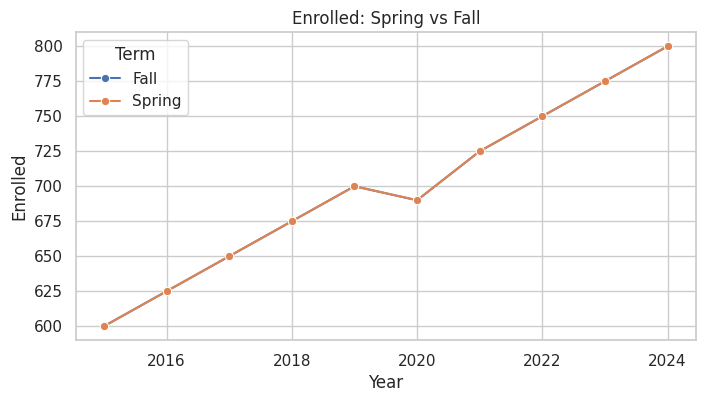

In [4]:
# 4) Visualizations required by the activity
retention = df.groupby('Year', as_index=False)['Retention Rate (%)'].mean().sort_values('Year')
plt.figure()
sns.lineplot(data=retention, x='Year', y='Retention Rate (%)', marker='o')
plt.title('Average Retention Rate by Year')
plt.show()

sat = df.groupby('Year', as_index=False)['Student Satisfaction (%)'].mean().sort_values('Year')
plt.figure()
sns.barplot(data=sat, x='Year', y='Student Satisfaction (%)')
plt.title('Average Satisfaction by Year')
plt.show()

term_comp = df.groupby(['Year','Term'], as_index=False)['Enrolled'].sum()
plt.figure()
sns.lineplot(data=term_comp, x='Year', y='Enrolled', hue='Term', marker='o')
plt.title('Enrolled: Spring vs Fall')
plt.show()
